In [1]:
import tensorflow as tf
print(tf.__version__)  

2.19.0


In [2]:
import pandas as pd
import numpy as np

# Define dataset URL
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

# Define column names
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

# Read dataset from URL
dataset = pd.read_csv(url, names=column_names, na_values='?',
                      comment='\t', sep=' ', skipinitialspace=True)

# Display last few rows of the dataset
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [3]:
# Display last few rows of the dataset
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [5]:
# Drop missing values
dataset = dataset.dropna()


In [6]:
# Statistical summary of the dataset
print(dataset.describe())


              MPG   Cylinders  Displacement  Horsepower       Weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       Acceleration  Model Year      Origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.0000

In [7]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='Origin')


In [8]:
print(dataset.columns)


Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin_1', 'Origin_2', 'Origin_3'],
      dtype='object')


In [9]:
dataset['Origin_1'] = dataset['Origin_1'].astype(int)
dataset['Origin_2'] = dataset['Origin_2'].astype(int)
dataset['Origin_3'] = dataset['Origin_3'].astype(int)
# men boolean la int 

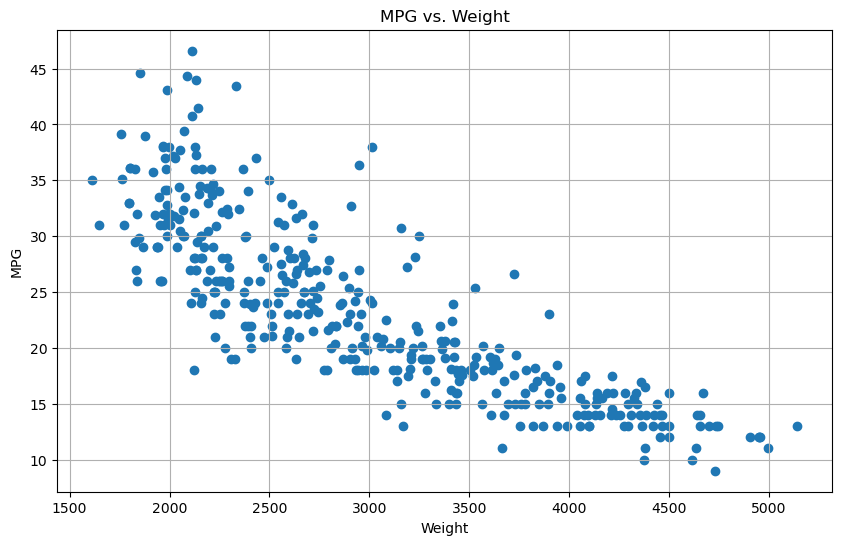

In [10]:
import matplotlib.pyplot as plt

# MPG vs. Weight
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Weight'], dataset['MPG'])
plt.title('MPG vs. Weight')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.grid(True)
plt.show()


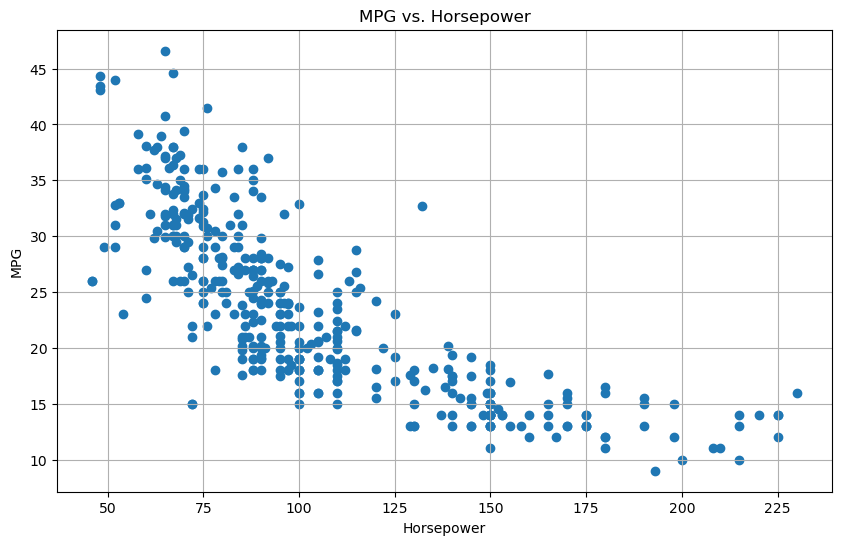

In [11]:
# MPG vs. Horsepower
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Horsepower'], dataset['MPG'])
plt.title('MPG vs. Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.grid(True)
plt.show()


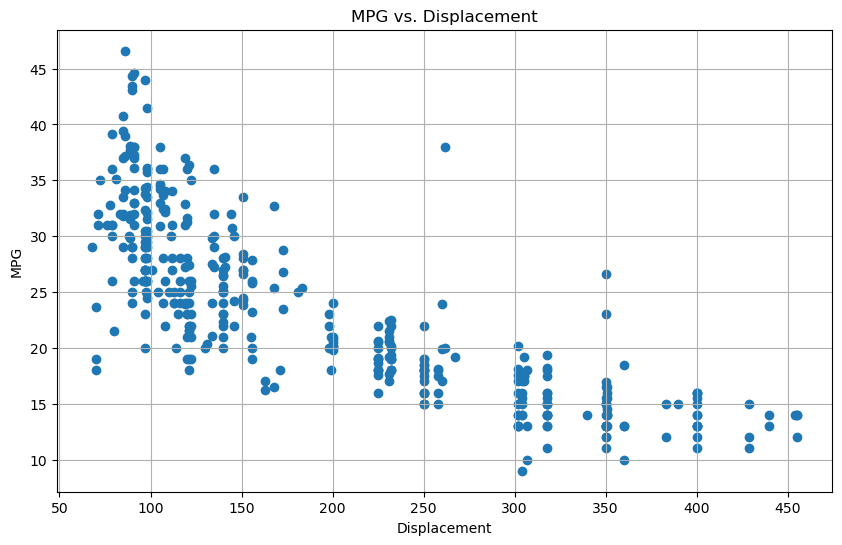

In [12]:

# MPG vs. Displacement
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Displacement'], dataset['MPG'])
plt.title('MPG vs. Displacement')
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.grid(True)
plt.show()


In [13]:
correlation_matrix = dataset.corr()

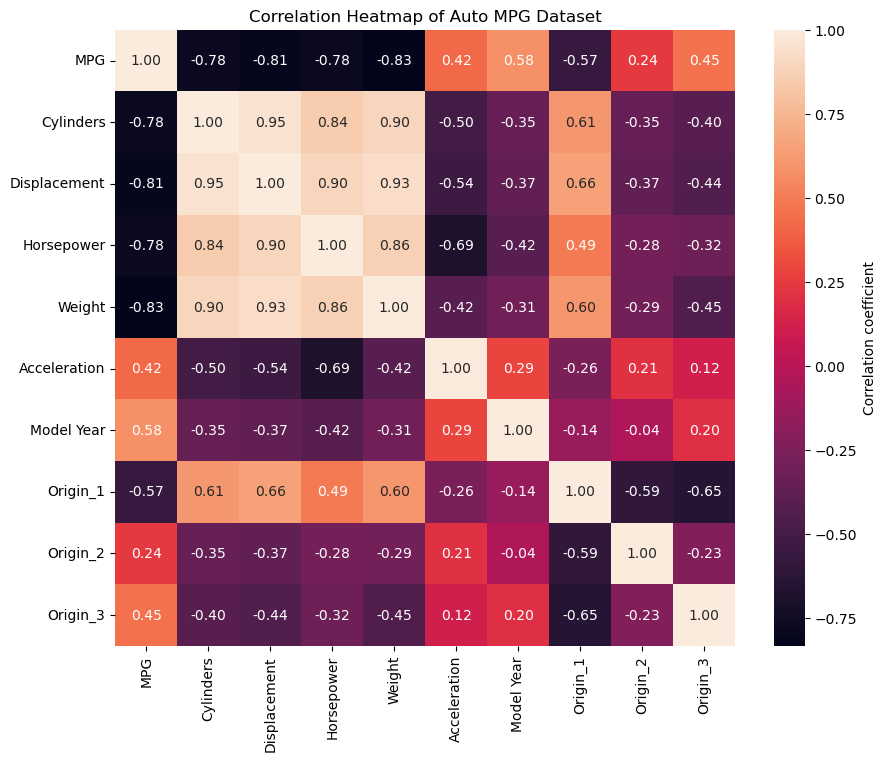

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the figure
plt.figure(figsize=(10, 8))

# Create the heatmap, add annotations and a color map
sns.heatmap(correlation_matrix, annot=True, fmt=".2f",  cbar_kws={'label': 'Correlation coefficient'})
plt.title('Correlation Heatmap of Auto MPG Dataset')
plt.show()


In [15]:
from sklearn.feature_selection import mutual_info_regression

X = dataset.drop(columns=['MPG'])
y = dataset['MPG']

feature_scores = mutual_info_regression(X, y)
feature_importance = pd.Series(feature_scores, index=X.columns).sort_values(ascending=False)
print(feature_importance)

Displacement    0.795315
Weight          0.783900
Horsepower      0.730865
Cylinders       0.638944
Model Year      0.325136
Origin_1        0.226914
Acceleration    0.194216
Origin_3        0.137516
Origin_2        0.050024
dtype: float64


In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
# Split Numeric & Categorical Features
numeric_features = ["Cylinders", "Displacement", "Horsepower", "Weight","Model Year"]
categorical_features = ["Origin_1"]

# Standardize Numeric Features

X = dataset.drop('MPG', axis=1)  # (labels ) All other columns are features
y = dataset['MPG']  # MPG is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)    #l seed value kermel zet l split kel marra

scaler = StandardScaler()
X_train_numeric = scaler.fit_transform(X_train[numeric_features])
X_test_numeric = scaler.transform(X_test[numeric_features])

# Keep Categorical Features Separate (No Standardization)
X_train_categorical = X_train[categorical_features].values
X_test_categorical = X_test[categorical_features].values
X_train_categorical = X_train_categorical.reshape(-1, 1)
X_test_categorical = X_test_categorical.reshape(-1, 1)


# Define Multi-Input Model
input_numeric = keras.Input(shape=(len(numeric_features),), name="numeric_features")
input_categorical = keras.Input(shape=(1,), name="categorical_features")

# Numeric Branch
x_numeric = layers.Dense(128, activation="relu")(input_numeric)
x_numeric = layers.BatchNormalization()(x_numeric)
x_numeric = layers.Dense(64, activation="relu")(x_numeric)

# Categorical Branch
x_categorical = layers.Dense(64, activation="relu")(input_categorical)
x_categorical = layers.BatchNormalization()(x_categorical)
x_categorical = layers.Dense(32, activation="relu")(x_categorical)

# Merge Both Branches
merged = layers.concatenate([x_numeric, x_categorical])
x = layers.Dense(128, activation="relu")(merged)
#x = layers.Dropout(0.3)(x)

x = layers.Dense(64, activation="relu")(x)
#x = layers.Dropout(0.2)(x)
output = layers.Dense(1, activation="linear")(x)



# Compile Model with Lower Learning Rate
model = keras.Model(inputs=[input_numeric, input_categorical], outputs=output)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse", metrics=["mae"])


In [17]:
early_stop = keras.callbacks.EarlyStopping(monitor="val_mae",
                                           patience=15,
                                           restore_best_weights=True,
                                           verbose =1 )

# Train Model
history = model.fit(
    [X_train_numeric, X_train_categorical], y_train,
    epochs=100, batch_size=16,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)
best_epoch = len(history.history['loss']) - early_stop.patience
print(f"\n🚀 Early Stopping Triggered at Epoch: {best_epoch + early_stop.patience}")  # Adjust for patience offse

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 559.5162 - mae: 22.1816 - val_loss: 574.5612 - val_mae: 22.8711
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 110.6809 - mae: 8.9674 - val_loss: 424.6163 - val_mae: 19.6399
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31.1120 - mae: 4.1838 - val_loss: 422.5244 - val_mae: 19.5019
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22.3896 - mae: 3.5551 - val_loss: 403.6658 - val_mae: 19.1089
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23.6467 - mae: 3.5969 - val_loss: 369.3112 - val_mae: 18.2568
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.6492 - mae: 3.0584 - val_loss: 372.3975 - val_mae: 18.3332
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.2980 - mae: 3.3176 - val_loss: 315.1624 - val_mae: 16.8046
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22.4315 - mae: 3.3504 - val_loss: 305.5568 - val_mae: 16.5828
Epoch 9/100
18/18 ━━━━━━━━━━

In [18]:
from sklearn.metrics import r2_score

# Evaluate the model
test_loss, test_mae = model.evaluate([X_test_numeric, X_test_categorical], y_test)

# Make predictions
y_pred = model.predict([X_test_numeric, X_test_categorical])

# Calculate R² Score
r2 = r2_score(y_test, y_pred.flatten())

# Print results
print(f"DNN Test Loss (MSE): {test_loss:.4f}")
print(f"DNN Test MAE: {test_mae:.4f}")
print(f"DNN R² Score: {r2:.4f}")



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.0714 - mae: 1.6630 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
DNN Test Loss (MSE): 5.5470
DNN Test MAE: 1.7143
DNN R² Score: 0.8913


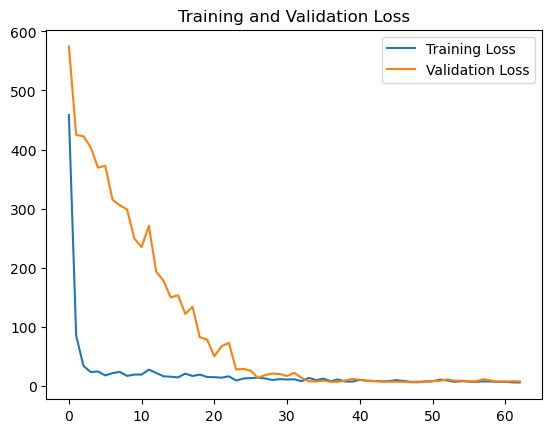

In [19]:
import matplotlib.pyplot as plt

# Tracer la perte d'entraînement et de validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


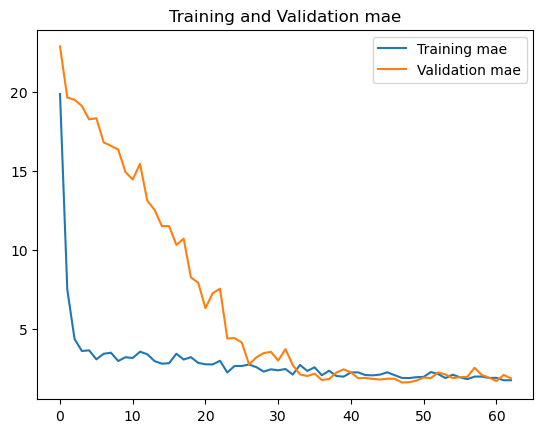

In [20]:
import matplotlib.pyplot as plt

# Tracer la perte d'entraînement et de validation
plt.plot(history.history['mae'], label='Training mae')
plt.plot(history.history['val_mae'], label='Validation mae')
plt.title('Training and Validation mae')
plt.legend()
plt.show()